In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define matplotlib defaults
plt.rcParams['figure.figsize']        = 8., 6.
plt.rcParams['axes.labelsize']        = 18
plt.rcParams['axes.titlesize']        = 18
plt.rcParams['xtick.top']             = True
plt.rcParams['xtick.bottom']          = True
plt.rcParams['ytick.left']            = True
plt.rcParams['ytick.right']           = True
plt.rcParams['xtick.direction']       = 'in'
plt.rcParams['ytick.direction']       = 'in'
plt.rcParams['xtick.labelsize']       = 14
plt.rcParams['ytick.labelsize']       = 14
plt.rcParams['xtick.major.pad']       = 6.
plt.rcParams['xtick.minor.pad']       = 6.
plt.rcParams['ytick.major.pad']       = 6.
plt.rcParams['ytick.minor.pad']       = 6.
plt.rcParams['xtick.major.size']      = 6. # major tick size in points
plt.rcParams['xtick.minor.size']      = 3. # minor tick size in points
plt.rcParams['ytick.major.size']      = 6. # major tick size in points
plt.rcParams['ytick.minor.size']      = 3. # minor tick size in points
plt.rcParams['text.usetex']           = False
plt.rcParams['font.family']           = 'serif'
plt.rcParams['font.size']             = 18

pd.set_option('display.max_columns', None)

# FFHQ256

In [2]:
experiment_prefix = 'FFHQ256'
# Load results
df = pd.read_csv(f'../data/{experiment_prefix.lower()}.csv')
models = df.model.unique().tolist()
print(df.shape)
df.head()

(227, 10)


,id,model,num_correct,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
0,participant_0,efficient-vdvae,189.0,0.055,0.03,0.08,0.475,434.27,200.18,234.09
1,participant_1,efficient-vdvae,191.0,0.045,0.04,0.05,0.495,157.49,76.19,81.30
2,participant_2,efficient-vdvae,178.0,0.110,0.16,0.06,0.550,165.03,88.07,76.97
3,participant_3,efficient-vdvae,180.0,0.100,0.14,0.06,0.540,197.11,91.66,105.45
4,participant_4,efficient-vdvae,185.0,0.075,0.07,0.08,0.495,198.15,89.89,108.26


In [3]:
columns = df.columns.tolist()[3:]
df_results = pd.DataFrame(columns=columns)
df_results_sem = pd.DataFrame(columns=columns)
for j, model in enumerate(models):
    model_res = df.loc[df['model'] == model]
    df_results.loc[model] = model_res.mean(numeric_only=True)
    df_results_sem.loc[model] = model_res.sem(numeric_only=True) # standard error of the mean

df_results

,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
efficient-vdvae,0.088400,0.095600,0.081200,0.50720,281.968400,140.758800,141.209200
insgen,0.255200,0.235600,0.274800,0.48040,325.794400,151.301200,174.492000
ldm,0.186400,0.178000,0.194800,0.49160,428.755600,205.735200,223.021200
projected-gan,0.120400,0.134000,0.106800,0.51360,318.164800,149.018000,169.147600
stylegan2-ada,0.215400,0.215600,0.215200,0.50020,358.502800,168.663200,189.839200
stylegan-xl,0.160400,0.158000,0.162800,0.49760,340.209200,150.212800,189.994800
stylenat,0.298600,0.283200,0.314000,0.48460,386.877600,183.340800,203.537600
styleswin,0.179600,0.160800,0.198400,0.48120,287.758400,135.370800,152.387600
unleashing,0.172593,0.202963,0.142222,0.53037,329.598519,153.707407,175.891481


In [4]:
df_results_sem

,err_rt,f_err_rt,r_err_rt,r_ans_rt,resp_time,f_resp_time,r_resp_time
efficient-vdvae,0.009664,0.009901,0.012914,0.006246,21.192406,11.390424,11.417181
insgen,0.017601,0.016473,0.024733,0.011478,23.777574,10.663910,13.574457
ldm,0.016489,0.021772,0.016167,0.009788,55.230255,31.712953,24.802889
projected-gan,0.012359,0.018257,0.011441,0.008909,28.410436,13.099294,17.466256
stylegan2-ada,0.016593,0.021056,0.019280,0.011498,39.876660,19.352118,20.783225
stylegan-xl,0.011633,0.021370,0.008114,0.011222,33.133068,15.977982,25.494670
stylenat,0.018738,0.022306,0.023345,0.013045,33.772931,15.968820,18.699738
styleswin,0.011913,0.010407,0.023084,0.013367,24.691156,10.567024,14.558143
unleashing,0.014621,0.021844,0.015232,0.011866,27.981263,12.376047,17.363162


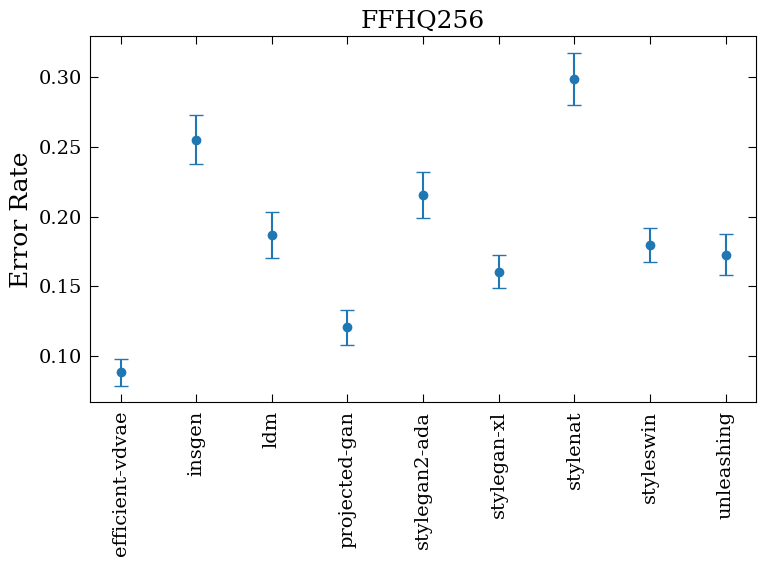

In [5]:
plt.errorbar(df_results.index, df_results.err_rt, yerr=df_results_sem.err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate")
plt.xticks(rotation=90)
plt.title(experiment_prefix.upper())
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()

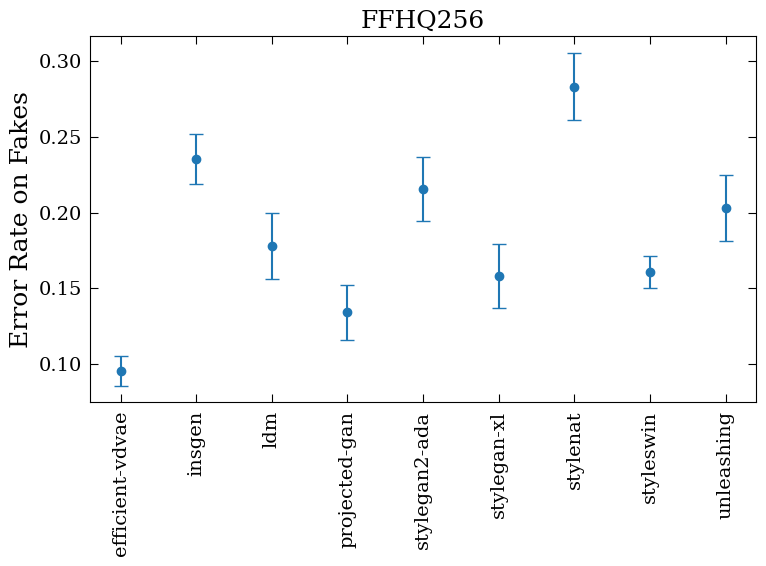

In [6]:
plt.errorbar(df_results.index, df_results.f_err_rt, yerr=df_results_sem.f_err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate on Fakes")
plt.xticks(rotation=90)
plt.title(experiment_prefix)
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_f_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()

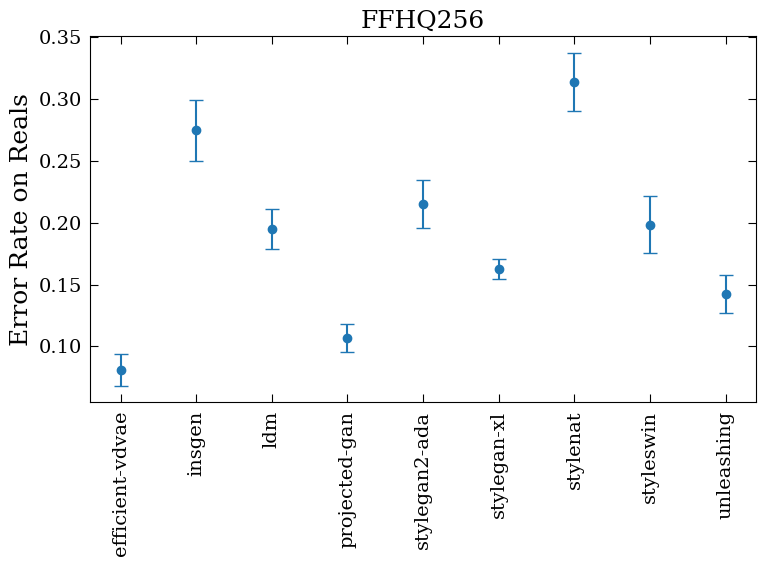

In [7]:
plt.errorbar(df_results.index, df_results.r_err_rt, yerr=df_results_sem.r_err_rt, fmt='o', capsize=5)
plt.ylabel("Error Rate on Reals")
plt.xticks(rotation=90)
plt.title(experiment_prefix)
plt.tight_layout()
plt.savefig(f'../plots/{experiment_prefix}_r_err_rt.png', bbox_inches=None, pad_inches=0.0)

plt.show()